## Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федерального оператора сотовой связи, предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
В нашем распоряжении небольшая выборка клиентов: данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

### План:
1. Открыть файл и изучить общую информацию, выявить проблемы в данных
2. Предобработка данных:
 - Привести данные к нужным типам;
 - Найти и исправить ошибки в данных;
 - Посчитать для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).
3. Анализ данных
 - Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
4. Проверить гипотезы:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
5. Сформулировать общий вывод


### Шаг 1. Откройте файл с данными и изучите общую информацию

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.patches as mpatches
from scipy import stats as st

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')


In [266]:
#create dictionary with key - data name, values - dataset and do loop to get first 10 rows of data
megaline_data = {
    'calls': calls,
    'internet': internet,
    'messages': messages,
    'users': users,
    'tariff': tariffs
}
for name, data in megaline_data.items():
    print('{}_data'.format(name))
    display(data.head(10))

calls_data


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


internet_data


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


messages_data


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


users_data


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


tariff_data


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [267]:
# for each data get info
for name, data in megaline_data.items():
    print()
    print('{}_data'.format(name))
    data.info()


calls_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

internet_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

messages_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [268]:
#count all na in our dataframes
for name, data in megaline_data.items():
    print('Number and percentage of missing values in dataframe:')
    print('{}_data'.format(name))
    display(data\
    .isna()\
    .sum()\
    .to_frame()\
    .rename(columns={0: 'Кол-во пропусков'})\
    .assign(perc = lambda row: row['Кол-во пропусков']/data.shape[0])\
    .rename(columns={'perc': 'Процент пропусков, %'})\
    .style.set_table_styles(
        [{'selector': 'tr:hover',
          'props': [('background-color', '#0B62B9')]}]
    ))

Number and percentage of missing values in dataframe:
calls_data


,Кол-во пропусков,"Процент пропусков, %"
id,0,0
call_date,0,0
duration,0,0
user_id,0,0


Number and percentage of missing values in dataframe:
internet_data


,Кол-во пропусков,"Процент пропусков, %"
Unnamed: 0,0,0
id,0,0
mb_used,0,0
session_date,0,0
user_id,0,0


Number and percentage of missing values in dataframe:
messages_data


,Кол-во пропусков,"Процент пропусков, %"
id,0,0
message_date,0,0
user_id,0,0


Number and percentage of missing values in dataframe:
users_data


,Кол-во пропусков,"Процент пропусков, %"
user_id,0,0
age,0,0
churn_date,462,0.924
city,0,0
first_name,0,0
last_name,0,0
reg_date,0,0
tariff,0,0


Number and percentage of missing values in dataframe:
tariff_data


,Кол-во пропусков,"Процент пропусков, %"
messages_included,0,0
mb_per_month_included,0,0
minutes_included,0,0
rub_monthly_fee,0,0
rub_per_gb,0,0
rub_per_message,0,0
rub_per_minute,0,0
tariff_name,0,0


In [269]:
#for each data get statistical metrics
for name, data in megaline_data.items():
    print()
    print('{}_data'.format(name))
    display(data.describe(include= 'all'))


calls_data


,id,call_date,duration,user_id
count,202607,202607,202607.000000,202607.000000
unique,202607,365,NaN,NaN
top,1023_47,2018-12-31,NaN,NaN
freq,1,1435,NaN,NaN
mean,NaN,NaN,6.755887,1253.940619
std,NaN,NaN,5.843365,144.722751
min,NaN,NaN,0.000000,1000.000000
25%,NaN,NaN,1.300000,1126.000000
50%,NaN,NaN,6.000000,1260.000000
75%,NaN,NaN,10.700000,1379.000000



internet_data


,Unnamed: 0,id,mb_used,session_date,user_id
count,149396.000000,149396,149396.000000,149396,149396.000000
unique,NaN,149396,NaN,365,NaN
top,NaN,1308_544,NaN,2018-12-31,NaN
freq,NaN,1,NaN,1057,NaN
mean,74697.500000,NaN,370.192426,NaN,1252.099842
std,43127.054745,NaN,278.300951,NaN,144.050823
min,0.000000,NaN,0.000000,NaN,1000.000000
25%,37348.750000,NaN,138.187500,NaN,1130.000000
50%,74697.500000,NaN,348.015000,NaN,1251.000000
75%,112046.250000,NaN,559.552500,NaN,1380.000000



messages_data


,id,message_date,user_id
count,123036,123036,123036.000000
unique,123036,364,NaN
top,1158_283,2018-12-31,NaN
freq,1,859,NaN
mean,NaN,NaN,1256.989410
std,NaN,NaN,143.523967
min,NaN,NaN,1000.000000
25%,NaN,NaN,1134.000000
50%,NaN,NaN,1271.000000
75%,NaN,NaN,1381.000000



users_data


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500.000000,500.00000,38,500,500,500,500,500
unique,NaN,NaN,33,76,246,419,270,2
top,NaN,NaN,2018-12-21,Москва,Радим,Андреенко,2018-05-28,smart
freq,NaN,NaN,2,99,6,5,8,351
mean,1249.500000,46.58800,NaN,NaN,NaN,NaN,NaN,NaN
std,144.481833,16.66763,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,18.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1124.750000,32.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1249.500000,46.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1374.250000,62.00000,NaN,NaN,NaN,NaN,NaN,NaN



tariff_data


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smart
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000,NaN
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214,NaN
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,NaN
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000,NaN
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000,NaN
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000,NaN


### Вывод

- Загружены 5 датасетов. Датасет calls состоит из 202607 строк и 4 столбцов. Датасет internet состоит из 149396 строк и 5 столбцов. Датасет messages состоит из 123036 строк и 3 столб. Датасет users состоит из 500 строк и 8 столбцов. Датасет tariff состоит из 2 строк и 8 столбцов.
- После получения информации и описания таблицы методами head() и info() мы заметили, что столбцы duration датасета calls и mb_used датасета internet содержат данные типа float, известно, что оператор «Мегалайн» всегда округляет вверх значения минут и мегабайтов, поэтому в следующем шаге мы округлим эти значения до целых чисел и заменим тип данных на int. Так же в столбце duration датасета calls есть нулевые значения, мы предположили, что это могут быть пропущенные звонки.  Столбцы message_date, session_date, call_date записаны как тип данных object, в следующем шаге заменим тип данных на datetime.
- Также в датасете internet мы заметили столбец Unnamed, который дублирует индексы и не содержит важной информации для последующего анализа, удалим столбец на этапе предобработки данных
- С помощью метода .isna().sum() обнаружили, что в столбце churn датасета users около 92% пропущенных значений, по умолчанию это юзеры, которые продолжали пользоваться тарифом на момент выгрузки данных, поэтому представляется логичным оставить этот столбец без изменений.

### Шаг 2. Предобработка данных

In [270]:
#change type object to data
users.reg_date = pd.to_datetime(users.reg_date,format='%Y-%m-%d')


In [271]:
#change type object to data
calls.call_date = pd.to_datetime(calls.call_date,format='%Y-%m-%d')

In [272]:
#change type object to data
messages.message_date = pd.to_datetime(messages.message_date,format='%Y-%m-%d')

In [273]:
#change type object to data
internet.session_date = pd.to_datetime(internet.session_date,format='%Y-%m-%d')
internet.loc[internet['mb_used']==0]

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


In [274]:
#rounding and change type to int
calls.duration = calls.duration.apply(np.ceil)
calls.duration = calls.duration.astype(int)
calls.duration

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int64

In [275]:
internet.mb_used = internet.mb_used.apply(np.ceil)
internet.mb_used = internet.mb_used.astype(int)
internet.loc[internet['mb_used']==0]

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0,2018-08-28,1000
38,38,1000_38,0,2018-11-27,1000
46,46,1000_46,0,2018-06-30,1000
67,67,1000_67,0,2018-06-16,1000
72,72,1000_72,0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0,2018-12-11,1499
149381,149381,1499_142,0,2018-11-01,1499
149383,149383,1499_144,0,2018-11-27,1499
149386,149386,1499_147,0,2018-10-21,1499


In [276]:
#remove unknown column
internet.drop(internet.columns[0], axis=1, inplace= True)
display(internet)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
...,...,...,...,...
149391,1499_152,319,2018-10-03,1499
149392,1499_153,491,2018-12-14,1499
149393,1499_154,0,2018-10-27,1499
149394,1499_155,1247,2018-11-26,1499


In [277]:
#we found out 0 values in column duration and suggested that calls of 0 minute are missed calls 
#we found out 0 values in column mb_used and suggested that it was unsuccessful internet sessions
print('Нулевой трафик: {}'.format(internet.loc[internet['mb_used']==0, 'mb_used'].count()))
print('Нулевые звонки: {}'.format(calls.loc[calls['duration']==0, 'duration'].count()))


Нулевой трафик: 19598
Нулевые звонки: 39613


In [278]:
#because it doesnt influence on revenue we drop them.
calls = calls.drop(calls[calls.duration == 0].index)
internet = internet.drop(internet[internet.mb_used == 0].index)

In [279]:
calls['month'] = calls.call_date.dt.month
#group by month and users calls data with pivot table
calls_by_month = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum'])
calls_by_month.columns=[ 'number of calls', 'calls duration']
calls_by_month

number of calls  calls duration
user_id month                                 
1000    5                   17             159
        6                   28             172
        7                   41             340
        8                   42             408
        9                   46             466
...                        ...             ...
1498    10                  30             247
1499    9                    8              70
        10                  44             449
        11                  62             612
        12                  56             492

[3168 rows x 2 columns]

In [280]:
messages['month'] = messages.message_date.dt.month
#group by month and users messages data with pivot table
messages_by_month = messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
messages_by_month.columns=[ 'number of messages']
messages_by_month

number of messages
user_id month                    
1000    5                      22
        6                      60
        7                      75
        8                      81
        9                      57
...                           ...
1498    10                     42
1499    9                      11
        10                     48
        11                     59
        12                     66

[2717 rows x 1 columns]

In [281]:
internet['month'] = internet.session_date.dt.month
#group by month and users internet data with pivot table
internet_by_month = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
#messages_by_month.columns=[ 'number of messages']
internet_by_month

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
...                ...
1498    10       20604
1499    9         1848
        10       17809
        11       17984
        12       13077

[3201 rows x 1 columns]

In [282]:
#count unique user id in each data
print('Unique users in calls data: {}'.format(len(calls.user_id.unique())))
print('Unique users in internet data: {}'.format(len(internet.user_id.unique())))
print('Unique users in messages data: {}'.format(len(messages.user_id.unique())))
print('Unique users in users data: {}'.format(len(users.user_id.unique())))

Unique users in calls data: 492
Unique users in internet data: 497
Unique users in messages data: 426
Unique users in users data: 500


In [283]:
#create additional dataset with all months
month = pd.DataFrame({'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})
month['key'] = 1
users['key'] = 1
#add the 12 months for each users in order to not miss the users without month for further merges
all_data = users.merge(month, on='key')
all_data = all_data.drop(columns = 'key')

In [284]:
# merge by user id users data and calls data using left merge
all_data = all_data.merge(calls_by_month.reset_index(), on=['user_id', 'month'], how='left')

In [285]:
# merge by user id and month all data and messages data using left merge
all_data = all_data.merge(messages_by_month.reset_index(), on=['user_id', 'month'], how='left')

In [286]:
# merge by user id and month all data and internet data using left merge
all_data = all_data.merge(internet_by_month.reset_index(), on=['user_id', 'month'], how='left')

In [287]:
# merge by tariff all data and tariffs data to have tariffs plan
all_data = all_data.merge(tariffs, left_on='tariff', right_on='tariff_name')
all_data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,number of calls,...,number of messages,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,NaN,...,NaN,NaN,1000,30720,3000,1950,150,1,1,ultra
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2,NaN,...,NaN,NaN,1000,30720,3000,1950,150,1,1,ultra
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,NaN,...,NaN,NaN,1000,30720,3000,1950,150,1,1,ultra
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,4,NaN,...,NaN,NaN,1000,30720,3000,1950,150,1,1,ultra
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,17.0,...,22.0,2256.0,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,8,NaN,...,NaN,NaN,50,15360,500,550,200,3,3,smart
5996,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,8.0,...,11.0,1848.0,50,15360,500,550,200,3,3,smart
5997,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10,44.0,...,48.0,17809.0,50,15360,500,550,200,3,3,smart
5998,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11,62.0,...,59.0,17984.0,50,15360,500,550,200,3,3,smart


In [288]:
#we drop dublicated column tariff_name and columns with first and last name because this information cant be usefull in further analysis
all_data = all_data.drop(['tariff_name', 'first_name', 'last_name'],axis = 1)
all_data

,user_id,age,churn_date,city,reg_date,tariff,month,number of calls,calls duration,number of messages,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,2018-05-25,ultra,1,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
1,1000,52,NaN,Краснодар,2018-05-25,ultra,2,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
2,1000,52,NaN,Краснодар,2018-05-25,ultra,3,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
3,1000,52,NaN,Краснодар,2018-05-25,ultra,4,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
4,1000,52,NaN,Краснодар,2018-05-25,ultra,5,17.0,159.0,22.0,2256.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaN,Пермь,2018-09-27,smart,8,NaN,NaN,NaN,NaN,50,15360,500,550,200,3,3
5996,1499,35,NaN,Пермь,2018-09-27,smart,9,8.0,70.0,11.0,1848.0,50,15360,500,550,200,3,3
5997,1499,35,NaN,Пермь,2018-09-27,smart,10,44.0,449.0,48.0,17809.0,50,15360,500,550,200,3,3
5998,1499,35,NaN,Пермь,2018-09-27,smart,11,62.0,612.0,59.0,17984.0,50,15360,500,550,200,3,3


In [289]:
#check unique users after merge 
len(all_data.user_id.unique())

500

In [290]:
#create a function to calculate revenue with tariff plan by users including extra payment 

def calculate_revenue(row):
    revenue = row['rub_monthly_fee']
    
    messages_diff = row['number of messages'] - row['messages_included']
    if messages_diff > 0:
        revenue += messages_diff * row['rub_per_message']
    calls_diff = row['calls duration'] - row['minutes_included']
    if calls_diff > 0:
        revenue += calls_diff * row['rub_per_minute']
    internet_diff = row['mb_used'] - row['mb_per_month_included'] 
    if internet_diff > 0:
        revenue += internet_diff * row['rub_per_gb']/1024
    
    return revenue

all_data['revenue'] = all_data.apply(calculate_revenue, axis=1)
all_data.head(10)

,user_id,age,churn_date,city,reg_date,tariff,month,number of calls,calls duration,number of messages,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,52,NaN,Краснодар,2018-05-25,ultra,1,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,NaN,Краснодар,2018-05-25,ultra,2,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1,1950.0
2,1000,52,NaN,Краснодар,2018-05-25,ultra,3,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,NaN,Краснодар,2018-05-25,ultra,4,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,NaN,Краснодар,2018-05-25,ultra,5,17.0,159.0,22.0,2256.0,1000,30720,3000,1950,150,1,1,1950.0
5,1000,52,NaN,Краснодар,2018-05-25,ultra,6,28.0,172.0,60.0,23257.0,1000,30720,3000,1950,150,1,1,1950.0
6,1000,52,NaN,Краснодар,2018-05-25,ultra,7,41.0,340.0,75.0,14016.0,1000,30720,3000,1950,150,1,1,1950.0
7,1000,52,NaN,Краснодар,2018-05-25,ultra,8,42.0,408.0,81.0,14070.0,1000,30720,3000,1950,150,1,1,1950.0
8,1000,52,NaN,Краснодар,2018-05-25,ultra,9,46.0,466.0,57.0,14581.0,1000,30720,3000,1950,150,1,1,1950.0
9,1000,52,NaN,Краснодар,2018-05-25,ultra,10,44.0,350.0,73.0,14717.0,1000,30720,3000,1950,150,1,1,1950.0


In [291]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 19 columns):
user_id                  6000 non-null int64
age                      6000 non-null int64
churn_date               456 non-null object
city                     6000 non-null object
reg_date                 6000 non-null datetime64[ns]
tariff                   6000 non-null object
month                    6000 non-null int64
number of calls          3168 non-null float64
calls duration           3168 non-null float64
number of messages       2717 non-null float64
mb_used                  3201 non-null float64
messages_included        6000 non-null int64
mb_per_month_included    6000 non-null int64
minutes_included         6000 non-null int64
rub_monthly_fee          6000 non-null int64
rub_per_gb               6000 non-null int64
rub_per_message          6000 non-null int64
rub_per_minute           6000 non-null int64
revenue                  6000 non-null float64
dtypes: datetime6

In [292]:
#change type og revenue column from float to int 
all_data.revenue = all_data.revenue.astype(int)

In [293]:
all_data.isna().sum()

user_id                     0
age                         0
churn_date               5544
city                        0
reg_date                    0
tariff                      0
month                       0
number of calls          2832
calls duration           2832
number of messages       3283
mb_used                  2799
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
revenue                     0
dtype: int64

In [294]:
#after the merge, the na means that's somes users didn't send messeage, call, or use internet.
#replacing by 0 allow us to reflect the absence of service use in the statistics
all_data['number of messages'] = all_data['number of messages'].fillna(0)
all_data['calls duration']= all_data['calls duration'].fillna(0)
all_data['mb_used'] = all_data['mb_used'].fillna(0)
all_data['number of calls'] = all_data['number of calls'].fillna(0)

### Вывод

- В предыдущем шаге мы определили, что столбцы message_date в датасете message, session_date в датасете internet и call_date в датасете calls записаны как тип данных object, что не является корректным. Мы заменили типы данных на datetime, используя метод to_datetime.
- По умолчанию нам известно, что оператор «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Поэтому методом apply и функцией ceil мы округлили значения в столбцах duration датасета calls и mb_used датасета internet в большую сторону, а затем методом astype заменили тип данных на целочисленнный.
- Так как столбец Unnamed в датасете internet не представлял важной информаии для анализа, мы удалили его методом drop
- Заменили нулевые значения в столбце duration на None, чтобы не учитывать эти данные в дальнейшем анализе при использовании агрегирующих функций
- С помощью метода dt.month создали столбцы в датасетах calls, internet, messages с номером месяца для дальнейшего анализа с группировкой по месяцам
- Сгруппировали и объединили данные по user_id и месяцам с помощью pivot table и метода merge и получили данные по длительности звонков, количеству сообщений и интернет трафику с разбивкой по юзерам и месяцам. Методом unique проверили наличие всех user_id после объединения
- Методом merge объединили все данные по юзерам с датасетом tariff, чтобы получить полный датасет с тарифными планами.
- Создали функцию calculate_revenue для расчета прибыли помесячно по каждому юзеру в соответствии с тарифным планом и включая дополнительные затраты юзеров при превышении лимитов по тарифу


### Шаг 3. Проанализируйте данные

In [295]:
#calculate average, std and var by tariff
stat_data = all_data.pivot_table(index= 'tariff', values = ['calls duration' ,'number of messages','mb_used','revenue'],aggfunc=[np.mean,np.median, np.var, np.std, np.max])
display(stat_data)


mean                                                \
       calls duration       mb_used number of messages      revenue   
tariff                                                                
smart      221.172127   8588.523504          17.666904   911.475783   
ultra      290.114094  10735.233781          27.194072  2010.853468   

               median                                               var  \
       calls duration mb_used number of messages revenue calls duration   
tariff                                                                    
smart           105.5  6050.5                0.0     550   62692.081265   
ultra            92.0  5451.0                0.0    1950  124198.479421   

                                                                  std  \
             mb_used number of messages        revenue calls duration   
tariff                                                                  
smart   8.391553e+07         699.325022  444427.203165     250.383868   
ultra   1.501340e+08        1861.580110   72880.439624     352.418046   

                                                              amax           \
             mb_used number of messages     revenue calls duration  mb_used   
tariff                                                                        
smart    9160.541815          26.444754  666.653736         1435.0  38610.0   
ultra   12252.916587          43.146032  269.963775         1673.0  49789.0   

                                   
       number of messages revenue  
tariff                             
smart               143.0    6711  
ultra               224.0    4743

In [296]:
#create a segment with smart tariff users
smart_tariff = all_data.query('tariff== "smart"')[['calls duration', 'number of messages', 'mb_used','messages_included','mb_per_month_included','minutes_included','revenue']]


In [297]:
#create a segment with smart tariff users
ultra_tariff = all_data.query('tariff== "ultra"')[['calls duration', 'number of messages', 'mb_used','messages_included','mb_per_month_included','minutes_included','revenue']]

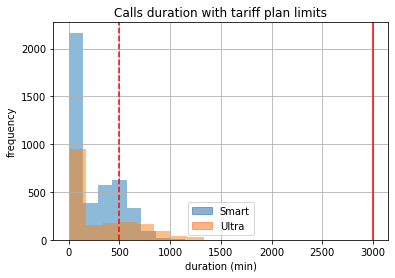

In [298]:
#built hist calls duration by tariff with tariff plan limits

pl.title("Calls duration with tariff plan limits")
pl.xlabel("duration (min)")
pl.ylabel("frequency")
smart_patch = mpatches.Patch(color='#1B62A5', alpha=0.5, label='Smart')
ultra_patch = mpatches.Patch(color='#FD690F', alpha=0.5, label='Ultra')
plt.legend(handles=[smart_patch, ultra_patch])
plt.axvline(x=smart_tariff.minutes_included.max(), color='r', linestyle='--')
plt.axvline(x=ultra_tariff.minutes_included.max(), color='r', linestyle='-')
smart_tariff['calls duration'].hist(alpha=0.5)
ultra_tariff['calls duration'].hist(alpha=0.5)


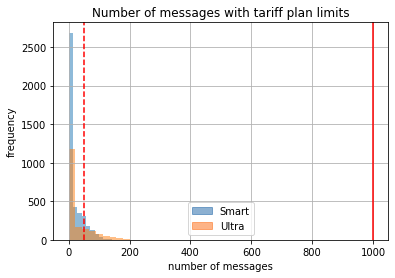

In [299]:
#built hist number of messages by tariff with tariff plan limits
pl.title("Number of messages with tariff plan limits")
pl.xlabel("number of messages")
pl.ylabel("frequency")
smart_patch = mpatches.Patch(color='#1B62A5', alpha=0.5, label='Smart')
ultra_patch = mpatches.Patch(color='#FD690F', alpha=0.5, label='Ultra')
plt.legend(handles=[smart_patch, ultra_patch])
plt.axvline(x=smart_tariff.messages_included.max(), color='r', linestyle='--')
plt.axvline(x=ultra_tariff.messages_included.max(), color='r', linestyle='-')
smart_tariff['number of messages'].hist(alpha=0.5)
ultra_tariff['number of messages'].hist(alpha=0.5)

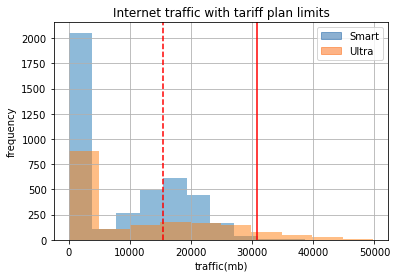

In [300]:
#built hist internet traffic by tariff with tariff plan limits
pl.title("Internet traffic with tariff plan limits")
pl.xlabel("traffic(mb)")
pl.ylabel("frequency")
smart_patch = mpatches.Patch(color='#1B62A5', alpha=0.5, label='Smart')
ultra_patch = mpatches.Patch(color='#FD690F', alpha=0.5, label='Ultra')
plt.legend(handles=[smart_patch, ultra_patch])

plt.axvline(x=smart_tariff.mb_per_month_included.max(), color='r', linestyle='--',label='Sine')
plt.axvline(x=ultra_tariff.mb_per_month_included.max(), color='r', linestyle='-')
smart_tariff['mb_used'].hist(alpha=0.5)
ultra_tariff['mb_used'].hist(alpha=0.5)

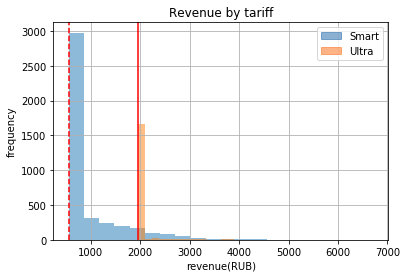

In [301]:
#built hist revenue traffic by tariff with tariff plan limits
pl.title("Revenue by tariff")
pl.xlabel("revenue(RUB)")
pl.ylabel("frequency")

smart_patch = mpatches.Patch(color='#1B62A5', alpha=0.5, label='Smart')
ultra_patch = mpatches.Patch(color='#FD690F', alpha=0.5, label='Ultra')
plt.legend(handles=[smart_patch, ultra_patch])

plt.axvline(x=550, color='r', linestyle='--',label='Sine')
plt.axvline(x=1950, color='r', linestyle='-')
smart_tariff['revenue'].hist(alpha=0.5, bins=20)
ultra_tariff['revenue'].hist(alpha=0.5, bins=20)

### Вывод

C помощью группировки по тарифу и статистических метрик мы составили картину поведения юзеров по тарифам:
- В тарифе smart по значениям calls duration и mb_used медиана несколько больше среднего значения, данные немного скошены влево, следовательно есть юзеры, которые совершают немного звонков и потребляют немного трафика в интернете. По значению number of messages среднее значение больше медианы, данные скошены вправо, следовательно есть выбросы - юзеры которые отправляют больше сообщений чем остальные. 
- В тарифе ultra по значениям calls duration, mb_used и number of messages среднее значение больше медианного, поэтому данные скошены вправо, что говорит о выбросах, т.е наличии юзеров, которые отправляют больше сообщений,совершают больше звонков и используют больше интернет трафика в месяц, чем большинство пользователей

Далее мы сравнили распределения значений calls_duration, mb_used, number of messages, revenue  с плановыми значениями по тарифам:
- На гистограмме calls duration with tariff plan limit мы видим , что по тарифу smart есть пользователи, которые превышают тарифный лимит. Так же на гистограмме видно, что пользователи тарифа ultra распределены далеко от линии лимита по тарифу, а некоторые юзеры тарифа ultra даже не превышают лимит по более дешевому тарифу smart.
- На гистограмме Number of messages with tariff plan limits мы видим, что большинство пользователей тарифа smart не превышают лимитов по количеству сообщений в месяц. Также все пользователи тарифа ultra распределены далеко от порогового значения, а большинство не превышает лимитов по более дешевому тарифу smart
- На гистограмме Internet traffic with tariff plan limits мы видим, что лимит по тарифу smart приходится приблизительно на середину распределения пользователей тарифа, что означет , что около половины юзеров доплачивают за дополнительные гигабайты интернета в месяц,можно также заметить, что большинство пользователей тарифа smart укладывается в лимиты по тарифу ultra. Большинство пользователей тарифа ultra укладываются в лимит, но есть пользователи, которые также доплачивают по тарифу за дополнительные гигабайты
- На гистограмме Revenue by tariff мы видим, что большое количество пользователей тарифа smart платит больше плановой суммы по тарифу, некоторые пользователи тарифа smart платят больше, чем лимит по тарифу ultra. Большинство пользователей тарифа ultra укладываются в плановый лимит,  есть пользователи тарифа, которые плятят больше, это связано с допольнительными тратами на интернет трафик



### Шаг 4. Проверьте гипотезы

Так как H₀ всегда формулируется так, чтобы использовать знак равенства, наша нулевая гипотеза: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не различается (равны). Исходя из H₀ наша альтернативная гипотеза H₁: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается(не равны).
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, мы использовали t-тест: применили метод scipy.stats.ttest_ind (array1, array2, equal_var) . Так как дисперсии не равны указали в параметре equal_var - False

In [302]:
#do t-test to prove hypothesis, alfa 5% by default

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    smart_tariff.revenue, 
    ultra_tariff.revenue, equal_var =  False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Полученное значение p-value менее критического уровня значимости, это значит, что мы можем отвергнуть нулевую гипотезу о равенстве средней выручки с пользователей в генеральных совокупностях по тарифам

In [303]:
#do segment by users who only from Moscow
Moscow_data = all_data.query('city == "Москва"')[['calls duration', 'number of messages', 'mb_used','messages_included','mb_per_month_included','minutes_included','revenue']]
#do segment by users who not from Moscow
other_region_data = all_data.query('city != "Москва"')[['calls duration', 'number of messages', 'mb_used','messages_included','mb_per_month_included','minutes_included','revenue']]
Moscow_data


,calls duration,number of messages,mb_used,messages_included,mb_per_month_included,minutes_included,revenue
12,0.0,0.0,0.0,1000,30720,3000,1950
13,0.0,0.0,0.0,1000,30720,3000,1950
14,0.0,0.0,0.0,1000,30720,3000,1950
15,0.0,0.0,0.0,1000,30720,3000,1950
16,0.0,0.0,0.0,1000,30720,3000,1950
...,...,...,...,...,...,...,...
5923,346.0,50.0,17295.0,50,15360,500,927
5924,322.0,48.0,14838.0,50,15360,500,550
5925,312.0,45.0,20690.0,50,15360,500,1591
5926,282.0,47.0,18733.0,50,15360,500,1208


In [304]:
Moscow_data.describe()

,calls duration,number of messages,mb_used,messages_included,mb_per_month_included,minutes_included,revenue
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,241.288721,19.480640,9249.382155,357.070707,20324.848485,1308.080808,1229.602694
std,291.560202,32.685148,10608.608935,444.512176,7187.060032,1169.768885,743.612901
min,0.000000,0.000000,0.000000,50.000000,15360.000000,500.000000,550.000000
25%,0.000000,0.000000,0.000000,50.000000,15360.000000,500.000000,550.000000
50%,53.500000,0.000000,3361.500000,50.000000,15360.000000,500.000000,869.000000
75%,460.000000,29.000000,17837.750000,1000.000000,30720.000000,3000.000000,1950.000000
max,1321.000000,191.000000,44341.000000,1000.000000,30720.000000,3000.000000,5186.000000


In [305]:
other_region_data.describe()

,calls duration,number of messages,mb_used,messages_included,mb_per_month_included,minutes_included,revenue
count,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000
mean,241.822527,20.759144,9223.024314,327.182045,19841.596010,1229.426434,1241.432668
std,285.082915,32.609051,10131.675966,431.893298,6983.032686,1136.561310,771.325143
min,0.000000,0.000000,0.000000,50.000000,15360.000000,500.000000,550.000000
25%,0.000000,0.000000,0.000000,50.000000,15360.000000,500.000000,550.000000
50%,107.500000,0.000000,6346.500000,50.000000,15360.000000,500.000000,885.000000
75%,460.250000,34.000000,17383.500000,1000.000000,30720.000000,3000.000000,1950.000000
max,1673.000000,224.000000,49789.000000,1000.000000,30720.000000,3000.000000,6711.000000


In [306]:
#get the variance
variance_regions = np.var(other_region_data.revenue)
variance_regions

594818.8393982832

In [307]:
variance_Moscow_data = np.var(Moscow_data.revenue)
variance_Moscow_data

552494.6923159768

Нулевая гипотеза: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов (они равны). 

Альтернативная гипотеза H₁: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов (они не равны)

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, мы использовали t-тест: применили метод scipy.stats.ttest_ind (array1, array2, equal_var) . В качестве альфа приняли общепринятое пороговое значение — 5%

In [308]:
#do t-test to prove hypothesis, alfa 5% by default

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Moscow_data.revenue, 
    other_region_data.revenue)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6335537463606906
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value больше критического уровня значимости, это значит, что мы не можем отвергнуть нулевую гипотезу о равенстве средней выручки с пользователей в генеральных совокупностях по тарифам, следовательно можем предположить , что они равны

### Общий вывод

Цель — понять, какой тариф приносит больше денег. Задача — проанализировать поведение клиентов и сделать вывод, какой тариф лучше.
  
На первом этапе анализа мы получили сырые данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Методом describe() оценили значения данных на наличие возможных аномалий и проверили типы данных методом info. Так же на первом этапе методом isna().sum мы обнаружили и посчитали пропущенные значения в столбце churn, которые впоследствии решили оставить без изменений, так как эти данные не повлияли на дальнейший анализ(пользователи с пропущенными значениями на момент выгрузки данных продолжают пользоватся тарифом)
 
На втором этапе изучив датасет, мы заметили не корректные типы данных в столбцах с датами и заменили их на datetime. Также на этапе предобработки мы округлили в большую сторону значения в столбцах длительность звонков и интернет трафика, так как по умолчанию оператор округляет вверх значения минут и мегабайтов и заменили тип данных на целочисленный. Нулевые значения в столбце длительности звонков заменили на None, чтобы в дальнейшем использовать агрегирующие функции без учета нулевых значений. Следующим пунктом на этом этапе было добавить столбец месяц в каждый датасет. Далее мы сгруппировали и объединили данные в одну таблицу по месяцу и  user_id и добавили плановые метрики по тарифам.
 
Третий этап состоял из анализа поведения пользователей исходя из данных по выборке. Сгруппировав данные по тарифу, применив статистические метрики и добавив плановые значения мы выяснили, что пользователи тарифа smart  чаще выходят за плановые значения по лимитам своего тарифа, а иногда даже превышают плановые значения по лимитам тарифа ultra(mb_used) и следовательно платят больше чем плановый платеж по тарифу smart. Пользователи тарифа ultra в среднем не превышают лимиты по тарифу, исключение составляют только траты на интернет трафик (mb_used), мы видим, что некоторые пользователи потребляют больше интернет трафика, чем по тарифу, следовательно платят дополнительно за превышение плановых лимитов

Основываясь на этих данных мы предположили, что средняя выручка по тарифам smart и ultra может быть одинакова. Для того чтобы определить противоречат ли данные нашей гипотезе, мы с помощью t-test, метода scipy.stats.ttest_ind (array1, array2, equal_var) выяснили, что полученное значение p-value менее критического уровня значимости (в качестве альфа приняли общепринятое пороговое значение — 5%), это значит, что мы можем отвергнуть нулевую гипотезу о равенстве средней выручки с пользователей в генеральных совокупностях по тарифам.
Следующей нашей нулевой гипотезой было равенство средней выручки пользователей из Москвы и выручки пользователей из других регионов, соответственно альтернативная гипотеза заключалась в том, что средние выручки не равны. Используя t-test, метод scipy.stats.ttest_ind (array1, array2, equal_var) выяснили, что полученное значение p-value больше критического уровня значимости (в качестве альфа приняли общепринятое пороговое значение — 5%), а это значит, что мы не можем отвергнуть нулевую гипотезу о равенстве средней выручки с пользователей в генеральных совокупностях по тарифам, следовательно можем предположить , что они равны.
